In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../
!hostname

/p/project1/cjinm11/Private/oberstrass1/git/pli/features/cl-3d
jrlogin07.jureca


In [2]:
# Load benchmark data

scaling_csv = "doc/node_scaling.csv"

batch_size = 128
epoch_size = 524288

gpus_per_node = 4
cpus_per_task = 32

###

import pandas as pd
import numpy as np

# Load values storing execution time of run_training_epoch function
df = pd.read_csv(scaling_csv)

df['nodes'] = (df['gpus'] / gpus_per_node).apply(np.ceil).astype(int)
df['cores'] = df['gpus'] * cpus_per_task

df['samples_per_s'] = epoch_size / df['runtime']

reference_sps = df.loc[0]['samples_per_s']
def compute_speedup(row):
    return row['samples_per_s'] / reference_sps

# Apply the function to each row in the DataFrame and create a new column
df['speedup'] = df.apply(lambda row: compute_speedup(row), axis=1)

ref_gpus = df.loc[0]['gpus']
def compute_efficiency(row):
    return ref_gpus * row['speedup'] / row['gpus']

df['efficiency'] = df.apply(lambda row: compute_efficiency(row), axis=1)

df.head()

,gpus,runtime,nodes,cores,samples_per_s,speedup,efficiency
0,2,4126.60,1,64,127.050841,1.000000,1.000000
1,4,2152.80,1,128,243.537718,1.916852,0.958426
2,8,1107.40,2,256,473.440491,3.726386,0.931597
3,16,585.41,4,512,895.591124,7.049077,0.881135
4,24,411.22,6,768,1274.957444,10.035018,0.836251


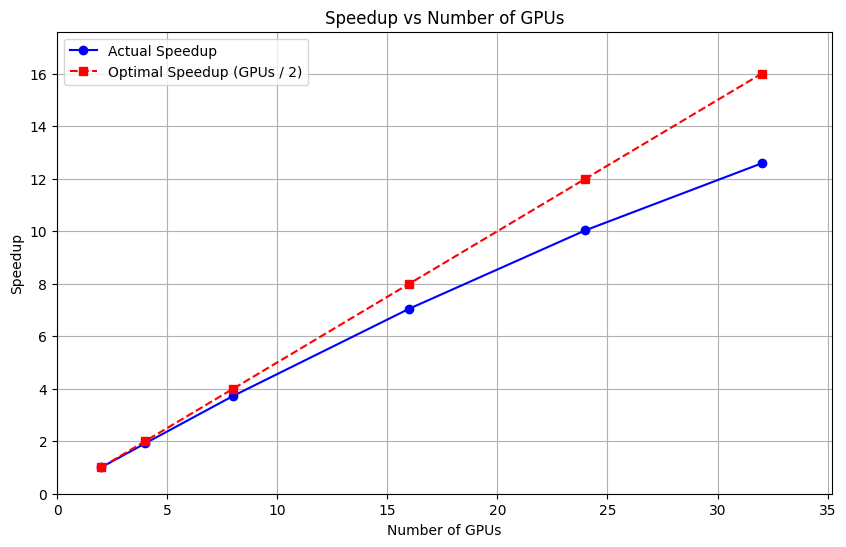

In [3]:
# Plot it

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot number of GPUs against speedup
plt.plot(df['gpus'], df['speedup'], 'o-', label='Actual Speedup', color='blue')

# Plot reference line for optimal speedup
optimal_speedup = df['gpus'] / 2
plt.plot(df['gpus'], optimal_speedup, 's--', label='Optimal Speedup (GPUs / 2)', color='red')

# Adding labels and title
plt.xlabel('Number of GPUs')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of GPUs')
plt.legend()

# Set x-axis limits
plt.xlim(0, 1.1 * df['gpus'].max())

# Set x-axis limits
plt.ylim(0, 1.1 * optimal_speedup.max())

# Display the plot
plt.grid(True)
plt.show()